Goal : Customer Segmentation 

Data Describtion :
https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
Data provide information about customer types to public mall.

Data importing & describtion :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("/content/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
x=data.iloc[:,[3,4]].values

In [11]:
print(x[0])

[15 39]


Choosing Number of Clusters

In [14]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  K=KMeans(n_clusters=i,init="k-means++",random_state=42)
  K.fit(x)
  wcss.append(K.inertia_)

Text(0, 0.5, 'WCSS')

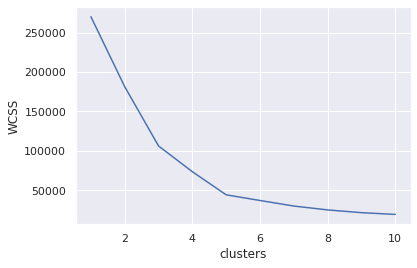

In [15]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("clusters")
plt.ylabel("WCSS")

In [17]:
# Training Model
KK=KMeans(n_clusters=5,init="k-means++")
KK.fit(x)
Y=KK.predict(x)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Text(0, 0.5, 'Spending Score')

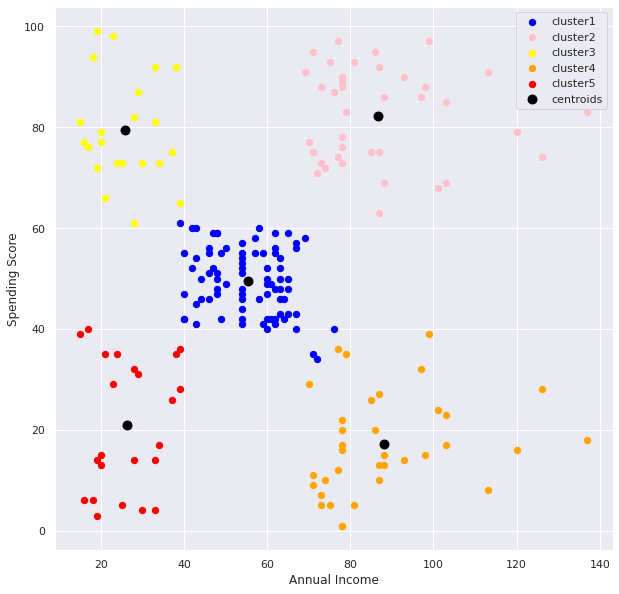

In [19]:
sns.set()
plt.figure(figsize=[10,10])
plt.scatter(x[Y==0,0],x[Y==0,1],s=40,c="blue",label="cluster1")
plt.scatter(x[Y==1,0],x[Y==1,1],s=40,c="pink",label="cluster2")
plt.scatter(x[Y==2,0],x[Y==2,1],s=40,c="yellow",label="cluster3")
plt.scatter(x[Y==3,0],x[Y==3,1],s=40,c="orange",label="cluster4")
plt.scatter(x[Y==4,0],x[Y==4,1],s=40,c="red",label="cluster5")
plt.scatter(KK.cluster_centers_[:,0],KK.cluster_centers_[:,1],s=80,c="black",label="centroids")
plt.legend()
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")